<a href="https://colab.research.google.com/github/SteelworkerDB/ML_W3/blob/main/LRoRF_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO REGRESIÓN LOGÍSTICA O BOSQUE ALEATORIO (CORE)
---

In [50]:
#Importar librerías base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [51]:
#importar sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [52]:
#CARGA DE DATOS
filename='/content/Wine_cultivars.csv'
dfw=pd.read_csv(filename)
dfw.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [53]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavonid phenols           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [54]:
dfw['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

Existen 3 clases de uva. El regresor logístico no funciona tan bien para clasificar más de dos clases.  Sin embargo, 3 clases no son demasiadas, al utilizar la estrategia OVR del regresor (one vs rest) la regresión puede dar buenos resultados.

In [55]:
#Ingresamos objetivo en y.
X=dfw.drop('Class label',axis=1)
y=dfw['Class label']



In [56]:
#Instanciar selectores de columnas
num_cols=make_column_selector(dtype_include='number')
cat_cols=make_column_selector(dtype_include='object')

In [57]:
#Instanciamiento de pipelines con imputers, scaler y encoder
num_imputer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'),
    ),
    ('scaler',StandardScaler()
    )
])
cat_imputer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent'),
    ),
    ('encoder',OneHotEncoder(handle_unknown='ignore')
    )
])

In [58]:
# Instanciamos el transformador de columna total.
col_transformer=ColumnTransformer(transformers=[
    ('num',num_imputer,num_cols),
    ('cat',cat_imputer,cat_cols)
])

In [59]:
#División de conjunto de datos de prueba y entrenamiento.
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=8)

In [60]:
#Ajuste del transformador al conjunto de entrenamiento
col_transformer.fit(X_train)

#Transformación de los datos según col_transformer
X_train_pro=col_transformer.transform(X_train)
X_test_pro=col_transformer.transform(X_test)

- **Aplicación de Regresión Logística:**

In [61]:
#Utilizamos GridSearchCV para encontrar los mejores parámetros paa el modelo de
#Regresión logística

pm = {'C': [0.001, 0.01, 0.1,1,10],
              'penalty': ['l1', 'l2'],
              'solver': ['newton-cg','lbfgs','liblinear','sag']}

gs = GridSearchCV(LogisticRegression(), pm, refit=True, verbose=2)
gs.fit(X_train_pro, y_train) #Entrenamiento con X_train y y_train

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, sol

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             verbose=2)

In [62]:
#Mejores parámetros hallados
gs.best_params_


{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [63]:
#Verificamos los parámetros con el conjunto de prueba
#Primero se instancia el modelo con los mejores parámetros:
log_reg=LogisticRegression(C=1,penalty='l2',solver='liblinear')
#Ajustamos el modelo al conjunto de entrenamiento:
log_reg.fit(X_train_pro,y_train)
#Encontramos las predicciones del modelo para el conjunto de prueba
y_pred=log_reg.predict(X_test_pro)
#Classification report para verificar exactitud, precisión, recall, f1
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Text(0.5, 1.0, 'Modelo Decision Tree')

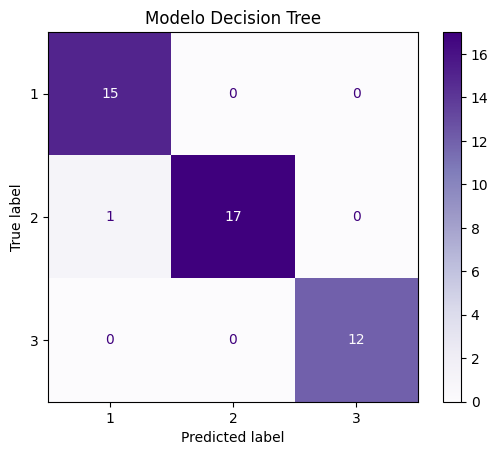

In [64]:
cm=confusion_matrix(y_test, y_pred)
#Matriz de confusión, se usa un mapa de colores púrpuras
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique().tolist())
disp.plot(cmap='Purples');
plt.title('Modelo Decision Tree')

El regresor logístico clasifica 15 como 1, 17 como de tipo 2 y 12 como de tipo 3.  En general, según el f1, el modelo es mejor para clasificar uva tipo 3.  Pero igual se comporta muy bien para clasificar uva tipo 2, y tipo 1, con 97%.

- **Aplicación de RF**

In [65]:
#Utilizamos GridSearchCV para encontrar los mejores parámetros paa el modelo de
#Random Forest

#Ahora pm contiene los hiperparámetros del modelo
pm = {
    #'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 3]
}


gs = GridSearchCV(RandomForestClassifier(), pm, refit=True, verbose=2)
gs.fit(X_train_pro, y_train) #Entrenamiento con X_train y y_train

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END max_depth=5, min_samples_lea

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 5]},
             verbose=2)

In [66]:
#Mejores parámetros del modelo
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [69]:
#Instanciamos el modelo con los mejores parámetros:
rf=RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)
#Ajustamos el modelo al conjunto de entrenamiento:
rf.fit(X_train_pro,y_train)
#Encontramos las predicciones del modelo para el conjunto de prueba
y_pred_r=rf.predict(X_test_pro)
#Classification report para verificar exactitud, precisión, recall, f1
print(classification_report(y_test,y_pred_r))

              precision    recall  f1-score   support

           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        18
           3       1.00      1.00      1.00        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Text(0.5, 1.0, 'Modelo Decision Tree')

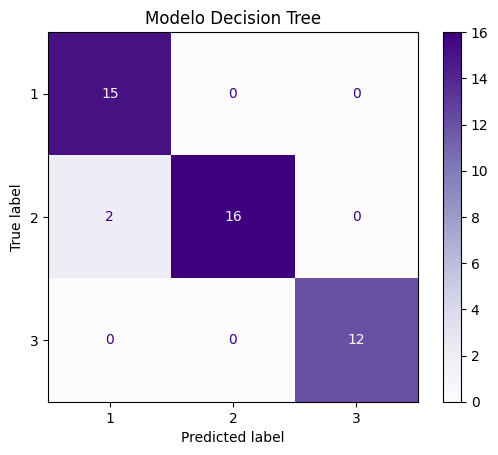

In [75]:
cm=confusion_matrix(y_test, y_pred_r)
#Matriz de confusión, se usa un mapa de colores púrpuras
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique().tolist())
disp.plot(cmap='Purples');
plt.title('Modelo Decision Tree')

- El modelo de bosque aleatorio también se comporta muy bien a la hora de predecir las uvas tipo 3.  Es ligeramente peor que el modelo de Regresión Logística, pero apenas con una diferencia de 1% en exactitud, y 3% en el puntaje de F1.

- **Aplicación de KNN**

In [73]:
#Utilizamos GridSearchCV para encontrar los mejores parámetros paa el modelo de
#K Vecinos más Cercanos

#Ahora pm contiene los hiperparámetros del modelo
pm = {'n_neighbors':[5,15,30,40]}


gs = GridSearchCV(KNeighborsClassifier(), pm, refit=True, verbose=2)
gs.fit(X_train_pro, y_train) #Entrenamiento con X_train y y_t

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_neighbors=30; total time=   0.0s
[CV] END .....................................n_n

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 15, 30, 40]}, verbose=2)

In [74]:
#Mejores parámetros del modelo
gs.best_params_

{'n_neighbors': 15}

In [78]:

#Instanciamos el modelo con los mejores parámetros:
knn=KNeighborsClassifier(n_neighbors=15)
#Ajustamos el modelo al conjunto de entrenamiento:
knn.fit(X_train_pro,y_train)
#Encontramos las predicciones del modelo para el conjunto de prueba
y_pred_knn=knn.predict(X_test_pro)
#Classification report para verificar exactitud, precisión, recall, f1
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        18
           3       1.00      1.00      1.00        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Text(0.5, 1.0, 'Modelo Decision Tree')

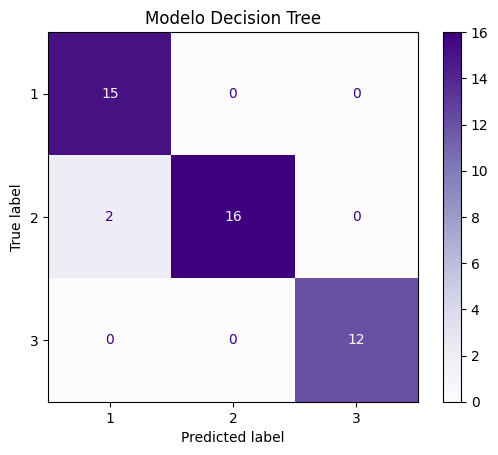

In [79]:
cm=confusion_matrix(y_test, y_pred_knn)
#Matriz de confusión, se usa un mapa de colores púrpuras
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique().tolist())
disp.plot(cmap='Purples');
plt.title('Modelo Decision Tree')

- El modelo de k vecinos más cercanos se comportó similar al modelo de random forest.

---
*¿Cuál es el modelo que mejor funciona?*

*¿Cuáles hiperparámetros afinaron para cada uno de los modelos? ¿Hay algún modelo que les gustó más y por qué?*

En este caso, el modelo de regresión logística se comportó de mejor manera, aunque puede ser por el tamaño de hiperparámetros que se probaron para aumentar el puntaje del modelo.

Para la regresión logística se ajustaron solver, regularización, C.  Para bosques aleatorios se probaron diferentes profundidades máximas, muestras mínimas para hojas y ramas.  Para k vecinos más cercanos se optimizó según el número de vecinos.

El regreso logístico, mientras sean pocas clases, parece funcionar bastante bien, y no demoro mucho en su entrenamiento.  